# 0. CNN Fundamentals
Convolutional Neural Networks

<img src="https://adeshpande3.github.io/assets/Cover.png" style="width: 800px"/>

- Fundamental CNN structures: CNNs are similar to MLPs since they only feed signals forward (feedforward nets), but have different kind of layers unique to CNNs
    - **Convolutional layer** : process data in a small receptive field (i.e., filter)
    - **Pooling layer** : downsample along 2 dimensions (usually width and height) 
    - **Dense (fully connected) layer** : similar to hidden layers of MLPs

<img src="https://miro.medium.com/max/2510/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg" style="width: 800px"/>
<br>

### 0.1. Image Inputs
- Input of image-format data is usually 4-D array in Tensorflow
<br> **(num_instance, width, height, depth)** </br>
    - **num_instance:** number of data instances. Usually designated as **None** to accomodate fluctuating data size
    - **width:** width of an image
    - **height:** height of an image
    - **depth:** depth of an image. Color images are usually with depth = 3 (3 channels for RGB). Black/white images are usually with depth = 1 (only one channel)
    
<img src="http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png" style="width: 400px"/>

In [7]:
from tensorflow.keras.preprocessing import image

- Loading image
    - Images can be loaded using load_img() function
    - Images can be converted to numpy array using img_to_array() function

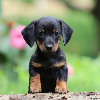

In [12]:
img = image.load_img('dog.jpg', target_size=(100,100))
img

In [17]:
img_arr = image.img_to_array(img)
img_arr.shape

(100, 100, 3)

# 1. CNN - Basics
 - Categorical Classification (Handwritten Digits)

### Dataset (+preprocessing)
- Digits dataset in sklearn
- Doc: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [33]:
data = datasets.load_digits()

In [34]:
X_data = data.images
y_data = data.target

print(X_data.shape)
print(y_data.shape)

(1797, 8, 8)
(1797,)


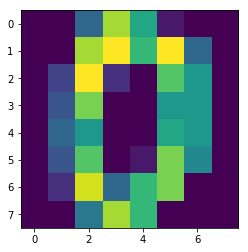

label:  0


In [35]:
plt.imshow(X_data[0])
plt.show()

print('label: ', y_data[0])

In [36]:
# reshape X_data into 3-D format
# note that this follows image format of Tensorflow backend
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))

print(X_data.shape)

(1797, 8, 8, 1)


In [37]:
# one-hot encoding of y_data
y_data = to_categorical(y_data)

print(y_data.shape)

(1797, 10)


In [38]:
# partition data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(1257, 10)
(540, 8, 8, 1)
(540, 10)


### CNN Model

In [46]:
import tensorflow as tf

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras import optimizers


In [47]:
model = Sequential()

###  - Convolutional Layer
- In general, 2D convolutional layer is used for image processing
- Doc: https://keras.io/layers/convolutional/
<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg" style="width: 400px"/>


- **Filters/Kernel_size:**
    - Number of filters (designated by 'filters' parameter) is equals to the **depth of next layer**
    - Size of filter (designated by 'kernel_size' parameter) defines **width and height of receptive field**

- **Strides** 
    - (designated by 'strides' parameter) is **how far a filter makes change in its position** for each move
- **Padding**
    - Image can be **zero-padded** in order to prevent getting too small (designated by 'padding' parameter)
    - Two types of padding options
        - **'valid'**: no padding (drop right-most columns & bottom-most rows)
        - **'same'**: padding size **p = [k/2]** when kernel_size = **k**
    - Customized paddings can be given with ZeroPadding**n**2D layer
        
<img src="https://miro.medium.com/max/922/1*kYSsNpy0b3fIonQya66VSQ.png" style="width: 400px"/>

In [48]:
model.add(Conv2D(input_shape=(8,8,1), filters=10, kernel_size=(3,3), strides=(1,1), padding='valid'))

print(model.output_shape)

(None, 6, 6, 10)


### - Activation Layer
- In general, relu is used as well
- Doc: http://cs231n.github.io/assets/cnn/depthcol.jpeg

In [49]:
model.add(Activation('relu'))

print(model.output_shape)

(None, 6, 6, 10)


### - Pooling layer
- Reduces number of parameters
- Usually, max pooling is applied for rectangular region
- pooling size, padding type, and strides can be set similar to convolutional layer
- Doc: https://keras.io/layers/pooling/
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width: 600px"/>

In [50]:
model.add(MaxPooling2D(pool_size=(2,2))) #If strides=None, it will default to `pool_size`.

print(model.output_shape)

(None, 3, 3, 10)


### - Flattening
- To be connected to fully connected layer (dense layer), convolutional/pooling layer should be **"flattened"**
- Resulting shape = **(Number of instances, width X height X depth)**

In [51]:
model.add(Flatten())

print(model.output_shape)

(None, 90)


### - Dense (fully connected layer)
- After flattening layer, fully connected layer can be added
- output shape (number of nodes) should be designated
- Sometimes, dense layers can be omitted
- Doc: https://keras.io/layers/core/

In [52]:
# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))

# final layer with 10 neurons to classify the instances
model.add(Dense(10, activation = 'softmax'))

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 6, 6, 10)          100       
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 10)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 90)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                4550      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
____________________________________________________

### - Model Compile & Fit (train)

In [54]:
adam = optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

In [55]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, verbose=0)

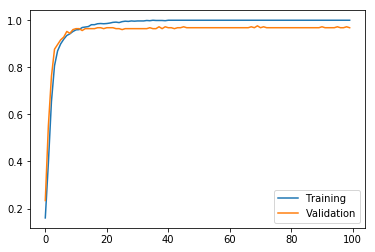

In [59]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.show()

### - Model Evaluate

In [60]:
model.evaluate(X_test, y_test, verbose=0)

[0.05760304333159217, 0.9851852]

In [61]:
model.metrics_names

['loss', 'acc']

# 2- CNN - Deep

### Deeper Networks
- It is one of definite trends that CNN models submitted to ILSVRC are getting deeper and deeper
<img src="https://cdn-images-1.medium.com/max/756/1*Io-I-fOM0jGftDb_nne4KQ.png" style="width: 600px"/>

<br>
- Deeper networks are able to learn more "abstract" representations by comprising more operations and nonlinearities 
- However, they are difficult and costly to train and prone to overfitting

<img src="http://cs231n.github.io/assets/cnnvis/filt1.jpeg" style="width: 400px"/>

### Dataset (+preprocessing)
- MNIST Dataset
- Doc: https://keras.io/datasets/

In [68]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [66]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [67]:
# reshaping X data: (n, 28, 28) => (n, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [69]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [70]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## 2.1. Deep CNN-1 (VGG)
- Deeper network with 6 convolutional layers and 3 pooling layers
- Note that two (3x3) convolutional layers are stacked
    - It is equivalent to using one (5X5) convolutional layer, but with fewer parameters
    - Similar to the structured used in VGGnet

<img src="http://www.hirokatsukataoka.net/research/cnnfeatureevaluation/cnnarchitecture.jpg" style="width: 600px"/>

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import optimizers

In [103]:
tf.keras.backend.clear_session()

In [104]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape=(28,28,1), filters=50, kernel_size=(3,3), strides=(1,1), padding='same')) ## Input Layer included
    model.add(Activation('relu'))
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) ### Layer1
    
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))  ### Layer2
    
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))  ### Layer3
    
    model.add(Flatten())
    model.add(Dense(50, activation='relu')) ### Layer 4
    
    model.add(Dense(10, activation='softmax'))  ### Layer 5
    
    
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [105]:
model = deep_cnn()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0

In [73]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 19min 39s


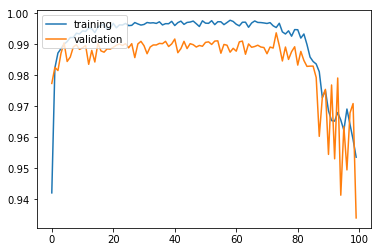

In [74]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training is rather unstable; accuracy falling down after around 80 epochs

In [75]:
results = model.evaluate(X_test, y_test)

 9664/10000 [===========================>..] - ETA: 0s

In [76]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9368


Training is rather unstable; accuracy falling down after around 80 epochs

## 2.2. Deep CNN-2 (VGG-Advanced)
- Using same dataset as Deep CNN-1 (MNIST), VGG blocks and advanced methods
- Measures used to enhance the performance of MLPs are employed
    - Weight Initialization
    - Batch Normalization
    - Dropout

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras import optimizers

In [107]:
tf.keras.backend.clear_session()

In [108]:
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape=(28,28,1), filters=50, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) ### Layer 1
    
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) ### Layer 2
    
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) ### Layer 3
    
    model.add(Flatten())
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.5))  ### Layer 4 (Dropout here)
    
    model.add(Dense(10, kernel_initializer='he_normal', activation='softmax'))  ### Layer 5 (No BatchNormalization here)
    
    adam = optimizers.Adam(lr=0.001)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [109]:
model = deep_cnn_advanced()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 50)        200       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 50)        0

In [84]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 38min 26s


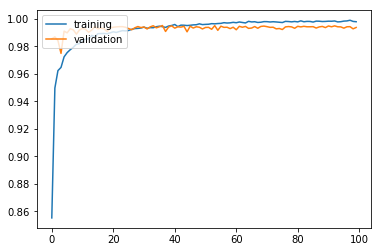

In [85]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Stable and comparable result is obtained

In [86]:
results = model.evaluate(X_test, y_test)

 9792/10000 [============================>.] - ETA: 0s

In [87]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9942


## 2.3. Deep CNN-3 (NIN, Inception)

- Using same dataset as Deep CNN-1 (MNIST)
- One of the ways to reduce the number of parameters in a model is proposed in Min et al 2013 (https://arxiv.org/abs/1312.4400)
- Namely "Network In Network (NIN)" or "1 X 1 convolutions"
    - Method is simple - adding convolutional layers after other convolutional layers
    - Has the effect of reducing the dimensionality (depth) of image space, effectively reducing the number of parameters
    
<img src="https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/conv_arithmetic/full_padding_no_strides_transposed_small.gif" style="width: 200px"/>

<br>
- GoogleNet architecture (Inception) utilizes NIN structure

<img src="https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/inception_1x1.png" style="width: 800px"/>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, concatenate, Input
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model

In [2]:
tf.keras.backend.clear_session()

In [3]:
def inception_module(input_layer, f1, f3_in, f3_out, f5_in, f5_out, f_pool):
    #1X1 conv
    conv1 = Conv2D(filters=f1, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu')(input_layer)
    #3X3 conv
    conv3 = Conv2D(filters=f3_in, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu')(input_layer)
    conv3 = Conv2D(filters=f3_out, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv3)
    #5X5 conv
    conv5 = Conv2D(filters=f5_in, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu')(input_layer)
    conv5 = Conv2D(filters=f5_out, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu')(conv5)
    #3X3 max pooling
    pool = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(input_layer)
    pool = Conv2D(filters=f_pool, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu')(pool)
    
    output_layer = concatenate([conv1, conv3, conv5, pool], axis=-1)
    
    return output_layer

In [4]:
input_layer = Input(shape=(28,28,1))
inception1= inception_module(input_layer, 64, 96, 128, 16, 32, 32)
inception2 = inception_module(inception1, 128, 128, 192, 32, 96, 64)
flat = Flatten()(inception2)
fc = Dense(64, activation='relu')(flat)
softmax = Dense(10, activation='softmax')(fc)

model = Model(inputs=input_layer, outputs=softmax)

adam = optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 96)   192         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 16)   32          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 28, 28, 1)    0           input_1[0][0]                    
______________________________________________________________________________________________

In [5]:
plot_model(model, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [ ]:
%%time
history = model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=0, validation_split=0.2)